In [1]:
import numpy as np
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [91]:
# data loading
data = loadmat('data1.mat')
X = data['X']
X_train,X_test=train_test_split(X,random_state=1,train_size=0.7,test_size=0.3)
num_feature = X.shape[1]

In [81]:
# normalization
X_norm = X.copy()
maximum = np.max(X_norm,axis=0,keepdims=True)
minimun = np.min(X_norm,axis=0,keepdims=True)
X_norm = (X_norm - minimun)/(maximum - minimun)

In [82]:
cov = np.matmul(X_norm.T,X_norm)

In [83]:
eig, vec = np.linalg.eig(cov)
idxes = np.argsort(eig)
idxes = idxes[::-1]
vec_sort = vec[idxes,:]
eig_sort = eig[idxes]
print(eig_sort)
print(vec_sort)

[33.66723197  0.74104574]
[[ 0.77737765 -0.62903417]
 [ 0.62903417  0.77737765]]


In [84]:
shrink_ratio = 0.3
# num_feat_pca = int(0.3*num_feature)
num_feat_pca = 1

In [85]:
W = vec[:,:num_feat_pca]

In [86]:
W.shape

(2, 1)

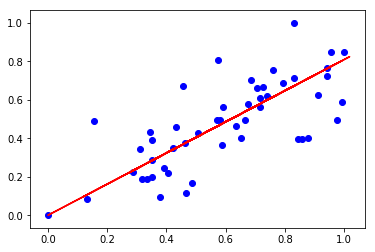

In [90]:
X_reduct = np.matmul(X_norm,W)
X_reduct = np.matmul(X_reduct,W.T)
plt.scatter(X_norm[:,0],X_norm[:,1],c='b')
plt.plot(X_reduct[:,0],X_reduct[:,1],c='r')